<a href="https://colab.research.google.com/github/iam-ajitkumartoppo/hotel-booking-analysis/blob/main/EDA_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

#### <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

#### <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns







###**Loading the dataset**


In [ ]:
#loading the dataset
df = pd.read_csv("Hotel Bookings (1).csv")

In [ ]:
#display the first 3 rows
df.head(3)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [ ]:
#display the last 3 rows
df.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#checking total number of rows and columns present in the dataset
df.shape

(119390, 32)

In [ ]:
#to print information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#checking for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#we replace the null values in 'agent' and 'company' with zero
df[['agent','company']]=df[['agent','company']].fillna(0)

In [ ]:
#The columns “children” and “country” have a low percentage of missing values.
# We remove the full row on missing cells.
df = df.dropna(axis=0)

In [ ]:
#checking if there are any rows where there are no adults,no babies and no children 
df[(df.adults+df.babies+df.children)==0].shape

(170, 32)

In [ ]:
# Drop Rows where there is no adult, baby and child
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [ ]:
# Check the null values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
#dispay all columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#detail description of our dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000,118728.000000
mean,0.371757,104.401312,2016.157596,27.165100,15.800965,0.928307,2.500918,1.861052,0.104356,0.007959,0.031593,0.087208,0.131612,0.218828,74.951065,10.546855,2.330638,102.133442,0.061915,0.571778
std,0.483276,106.915284,0.707456,13.586362,8.780412,0.992725,1.889089,0.574697,0.399439,0.097449,0.174915,0.846419,1.485300,0.638914,107.170463,53.462466,17.633065,50.389602,0.244230,0.792740
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
## we convert datatype of columns children,company,agent from float to integer as the data contains only integer value
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

Removing the outliers by using conditionals to get and update these values.

In [ ]:
#removing the outliers
df.loc[df.lead_time > 500, 'lead_time'] = 500
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.children > 8, 'children'] = 0

In [ ]:
#removing the outliers
df.drop(df[df['adr']>5000].index, inplace=True)

In [ ]:
#check the statistical details of our dataset after the outlairs are removed
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000,118727.000000
mean,0.371752,104.144634,2016.157597,27.165219,15.800888,0.923926,2.481272,1.858263,0.104273,0.007799,0.031593,0.054259,0.028553,0.215520,74.951595,10.546944,2.330658,102.088820,0.061780,0.571782
std,0.483275,105.845955,0.707459,13.586357,8.780408,0.966824,1.758124,0.483465,0.398406,0.089300,0.174916,0.226529,0.166547,0.598214,107.170759,53.462682,17.633138,47.986733,0.242048,0.792741
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,500.000000,2017.000000,53.000000,31.000000,5.000000,10.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,5.000000,535.000000,543.000000,391.000000,510.000000,3.000000,5.000000


In [ ]:
#size of dataset
df.shape

(118727, 32)

In [ ]:
#to print information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118727 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118727 non-null  object 
 1   is_canceled                     118727 non-null  int64  
 2   lead_time                       118727 non-null  int64  
 3   arrival_date_year               118727 non-null  int64  
 4   arrival_date_month              118727 non-null  object 
 5   arrival_date_week_number        118727 non-null  int64  
 6   arrival_date_day_of_month       118727 non-null  int64  
 7   stays_in_weekend_nights         118727 non-null  int64  
 8   stays_in_week_nights            118727 non-null  int64  
 9   adults                          118727 non-null  int64  
 10  children                        118727 non-null  int64  
 11  babies                          118727 non-null  int64  
 12  meal            

In [ ]:
#code  to classify the columns as numerical or categorical
cat_cols = [col for col in df.columns if df[col].dtype=='object']
print('Categorical features are: ', cat_cols)

print('\n')

num_cols = [col for col in df.columns if df[col].dtype!='object' and col!='is_canceled']
print('Numerical features are: ', num_cols)


Categorical features are:  ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


Numerical features are:  ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [ ]:
#code to ignore warrnings dispayed
import warnings
warnings.filterwarnings('ignore')

**Q1. How much of the bookings done get cancelled?**

In [ ]:
#checking number of bookings cancelled 0-not cancelled, 1-cancelled
df.is_canceled.value_counts()

0    74590
1    44137
Name: is_canceled, dtype: int64

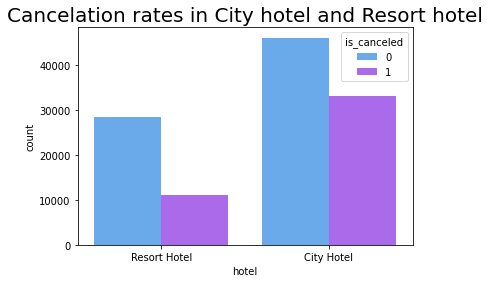

In [ ]:
sns.countplot(x='hotel',hue="is_canceled", data=df,palette='cool')
plt.title("Cancelation rates in City hotel and Resort hotel", size=20)
plt.show()

we can observe from graph above that city hotel has high number of booking request and it also has high number of cancellation rate than the resort hotel.


In [ ]:
#for further analysis we want to consider the bookigs that were not cancelled
df_1 = df[df['is_canceled'] == 0]

**Q2. which type of hotel has higher number of bookings City Hotel or Resort Hotel?**

In [ ]:
#to count number of bookinga done in city and resort hotel 
df_1.hotel.value_counts()

City Hotel      46082
Resort Hotel    28508
Name: hotel, dtype: int64

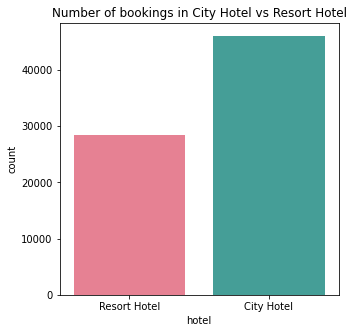

In [ ]:
#plotting countplot
plt.figure(figsize=(5,5))
sns.countplot(df_1['hotel'], palette='husl')
plt.title("Number of bookings in City Hotel vs Resort Hotel")
plt.show()


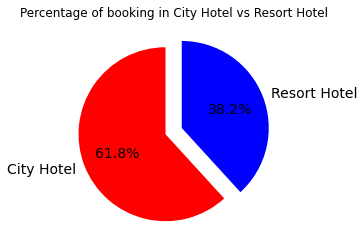

In [ ]:
labels = df_1['hotel'].value_counts().index.tolist()
sizes = df_1['hotel'].value_counts().tolist()
explode = (0.1, 0.1)
colors = ['red', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})
plt.title("Percentage of booking in City Hotel vs Resort Hotel")
plt.show()

  Total number of bookings from hotels-74590
</br>There are two types of hotels</br>
1.Resort Hotel</br>
  number of bookings from resort hotel-28508
 </br> percentage of booking from resort hotel-38.2%
</br>2.City Hotel</br>
  number of bookings from city hotel-46082
 </br> percentage of bookings from city hotel-61.8%



**Q3. In which month maximum number of bookings are done?**

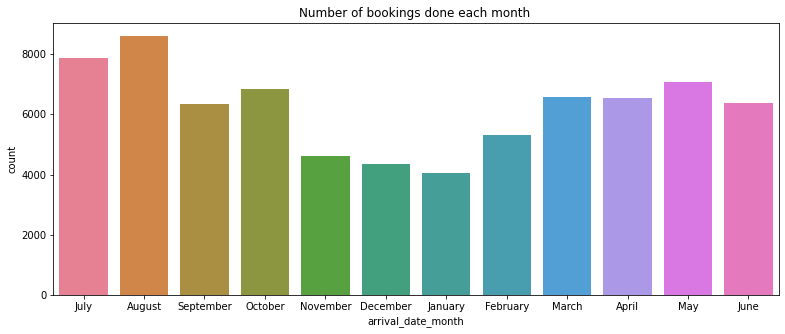

In [ ]:
plt.figure(figsize=(13,5))
sns.countplot(df_1['arrival_date_month'], palette='husl')
plt.title("Number of bookings done each month ")
plt.show()

In [ ]:
print("Number of bookings done each month-\n",df_1.arrival_date_month.value_counts())

Number of bookings done each month-
 August       8604
July         7880
May          7091
October      6854
March        6566
April        6528
June         6384
September    6360
February     5304
November     4611
December     4347
January      4061
Name: arrival_date_month, dtype: int64


we can see maximum bookings are done in month of july & august<br>
while minimum number of bookings are done in month of january and december

**Q4. From which country maximum number of bookings are done?**

In [ ]:
df_1.country.value_counts()

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
BHR        1
DJI        1
MLI        1
NPL        1
FRO        1
Name: country, Length: 165, dtype: int64

Top countries from where bookings are done</br>
1.Portugal-20977</br>
2.United Kingdom-9668</br>
3.France-8468</br>
4.Spain-6383</br>
5.Germany-6067</br>




**Q5. Which is the most preferred type of room for booking?**

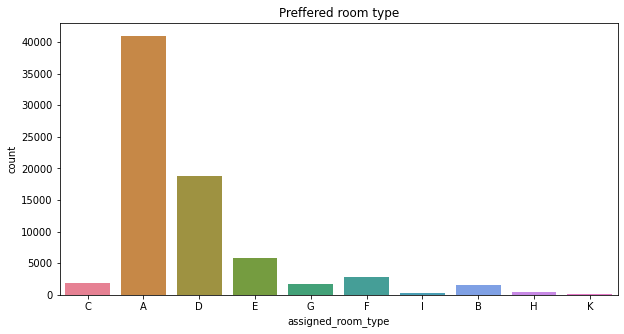

In [ ]:
#potting countplot
plt.figure(figsize=(10,5))
sns.countplot(df_1['assigned_room_type'], palette='husl')
plt.title("Preffered room type")
plt.show()

In [ ]:
df_1.assigned_room_type.value_counts()

A    40930
D    18796
E     5774
F     2806
C     1905
G     1755
B     1643
H      457
I      348
K      176
Name: assigned_room_type, dtype: int64

people prefer specific rooms more than others.

**Q6. How many guest are repeated customers?**

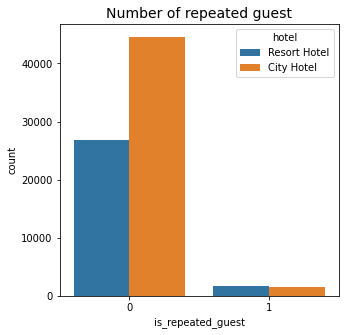

In [ ]:
#plotting countplot
plt.figure(figsize=(5,5))
sns.countplot(data = df_1, x = 'is_repeated_guest', hue = 'hotel').set_title('Number of repeated guest', fontsize = 14)
plt.show()

In [ ]:
df_1.is_repeated_guest.value_counts()

0    71389
1     3201
Name: is_repeated_guest, dtype: int64

most of the bookings done are not by the repeated customers


**Q7. Which type of meal is most preferred by the customers?**

In [ ]:
df_1.meal.value_counts()

BB           57341
HB            9449
SC            6601
Undefined      879
FB             320
Name: meal, dtype: int64

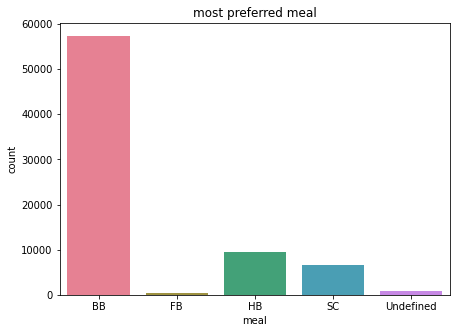

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(df_1['meal'], palette='husl')
plt.title("most preferred meal")
plt.show()

most people prefer BB which is bed and breakfast
very few prefer FB which is full board(breakfast,lunch & dinner)


**Q8. which type of deposit customers prefer?**

In [ ]:
df_1.deposit_type.value_counts()

No Deposit    74371
Refundable      126
Non Refund       93
Name: deposit_type, dtype: int64

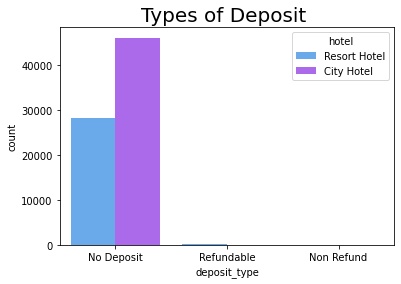

In [ ]:
sns.countplot(data = df_1, x = 'deposit_type',hue='hotel', palette='cool')
plt.title('Types of Deposit ', size=20)

plt.show()

most people are not giving advanced deposit to ensure booking.
there are very few people who give some amount of money for ensuring advanced booking

**Q9. In which year most of the bookings were done?**

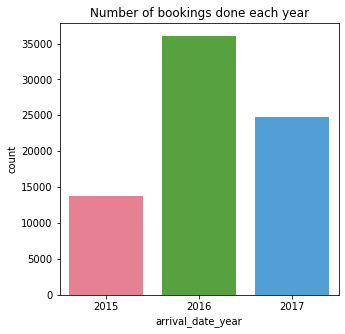

In [ ]:
#plot countplot
plt.figure(figsize=(5,5))
sns.countplot(df_1['arrival_date_year'], palette='husl')
plt.title("Number of bookings done each year")
plt.show()


In [ ]:
df_1.arrival_date_year.value_counts()


2016    36051
2017    24814
2015    13725
Name: arrival_date_year, dtype: int64

number of bookings records for the the year 2016-36051,2017-24814,2015-13725.

**Q10. Which type of customers are most likely to visit?**

In [ ]:
print(df_1.customer_type.value_counts())

Transient          52597
Transient-Party    18673
Contract            2810
Group                510
Name: customer_type, dtype: int64


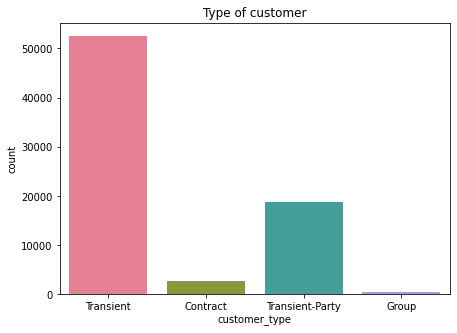

In [ ]:
#plot countplot
plt.figure(figsize=(7,5))
sns.countplot(df_1['customer_type'], palette='husl')
plt.title('Type of customer')
plt.show()

Transient party customers are most likely to visit.

**Q11. How the ADR varies over the year for both the hotels?**

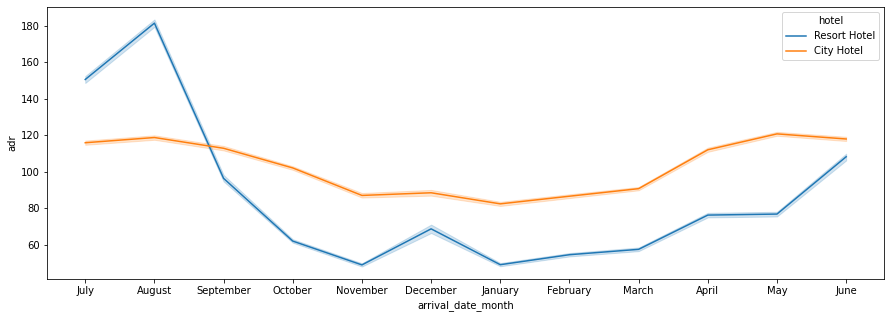

In [ ]:
#lineplot of the adr for different hotel types
plt.figure(figsize=(15,5))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df_1)
plt.show()

August month has higher ADR while January has lowers ADR,for most of the months city hotel has higher ADR than resort hotel.

**Q12. Which is the most preferred method for the booking?**

In [ ]:
df_1.market_segment.value_counts()

Online TA        35599
Offline TA/TO    15854
Direct           10504
Groups            7692
Corporate         4121
Complementary      637
Aviation           183
Name: market_segment, dtype: int64

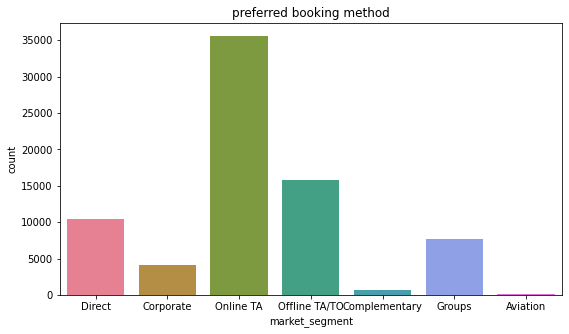

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(df_1['market_segment'], palette='husl')
plt.title('preferred booking method')
plt.show()

Majority of the bookings are done by Online TA and Offline TA/TO

**Q13. Before how many days most of the bookings are done?**

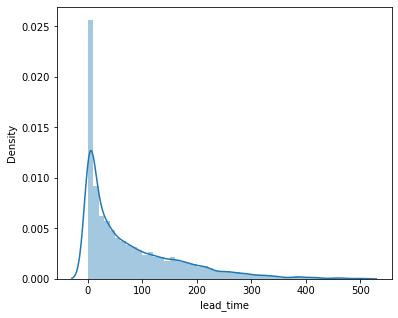

In [ ]:
plt.figure(figsize=(6,5))
sns.distplot(a=df_1['lead_time'], label='lead_time_distribution')
plt.show()

We see that there is a positive skewness in the lead time.
Most of booking done are planned for a close time but still we can see few percentage of people who do planning a long before their arrival. 

